# Image Denoising

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 13 December 2018**  
**Project Github:** https://github.com/joyfuldahye/MFCVML_Assignments/tree/master/Assignment11  

**Requirements** 

* $f = u + \eta$ where $f$ is an input noisy image, $u$ is a desired reconstruction, and $\eta$ is a noise process  
* Noise process $\eta $~ $N(0, \sigma^2)$ is assumed to follow the normal distribution with mean 0 and standard deviation $\sigma$  
* The reconstruction error $\epsilon(u;\lambda) = ||u-f||_{2}^2 + \lambda||\nabla u||_{2}^2 $ where $||\nabla u||_{2}^2 = ||\frac{\partial u}{\partial x}||_{2}^2 + ||\frac{\partial u}{\partial y}||_{2}^2 $ and $\lambda \in \mathbb{R}$ is a weight  
* Solve the least square problem $||Ax - b||_{2}^2$ where $x$ is a vector that is vectorised from $f$ in column-wise. 
* Use sparse matrix to save memory required to solve the least square problem. 
* If neccesary, it is allowed to reduce the size of the given image to save the memory in the computation of the least square problem.

**Essential Visualisation**

* Try with the varying noise standard deviation $\sigma$ and the regularization parameter $\lambda$  
* Present the reconstruction image with varying regularization parameter $\lambda = ..., 2^{-3},2^{-2},2^{-1},2^{0},2^{1},2^{2},2^{3},...$  
* Present the reconstruction error $\varepsilon(u;\lambda)$ with varying regulariation parameter $\lambda$

-----------------------------------------------------------------------

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from scipy.sparse import csc_matrix, eye, vstack, diags
from scipy.sparse.linalg import lsqr

## Preprocess image

In [2]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

## Plot original image and noisy image

(-0.5, 299.5, 204.5, -0.5)

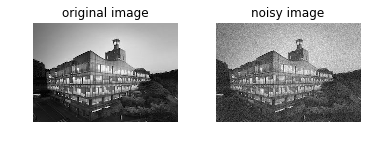

In [3]:
p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

## Compute a desired reconstruction 
$\epsilon(u;\lambda) = ||u-f||_{2}^2 + \lambda||\nabla u||_{2}^2 $

* $  \Bigg| \Bigg|
\begin{bmatrix}
I \\
\sqrt{\lambda} D_x \\
\sqrt{\lambda} D_y
\end{bmatrix} v - 
\begin{bmatrix}
w \\
0 \\
0
\end{bmatrix}
\Bigg| \Bigg|_2^2 = ||Av - b||_2^2
$
  * $u \to v$
  * $f \to w$

* Reconstructed image: $v = (A^TA)^{-1}A^Tb$

---------------------------Reconstruction---------------------------
With LAMBDA = 0.03125


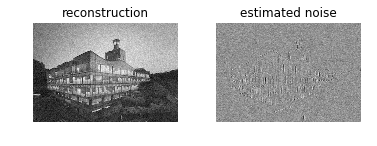

reconstruction error: 44.603807239223656
-----------------------------------------------------------------------
With LAMBDA = 0.0625


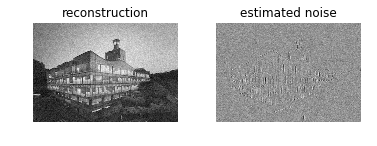

reconstruction error: 41.741749403344514
-----------------------------------------------------------------------
With LAMBDA = 0.125


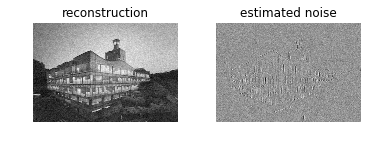

reconstruction error: 38.94880192254704
-----------------------------------------------------------------------
With LAMBDA = 0.25


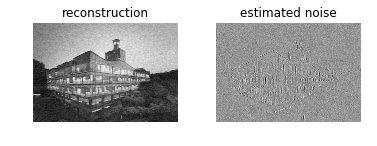

reconstruction error: 37.93107439486414
-----------------------------------------------------------------------
With LAMBDA = 0.5


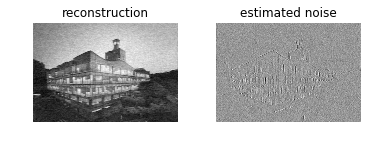

reconstruction error: 39.872902059686446
-----------------------------------------------------------------------
With LAMBDA = 1


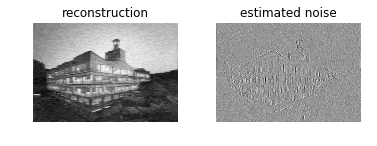

reconstruction error: 44.33601423709934
-----------------------------------------------------------------------
With LAMBDA = 2


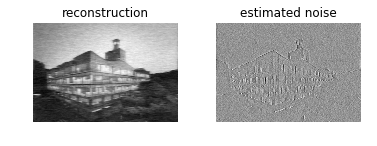

reconstruction error: 50.19551909388966
-----------------------------------------------------------------------
With LAMBDA = 4


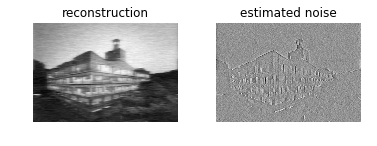

reconstruction error: 56.67169169299783
-----------------------------------------------------------------------
With LAMBDA = 8


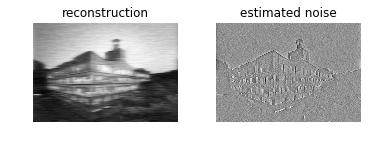

reconstruction error: 63.45750039639913
-----------------------------------------------------------------------
With LAMBDA = 16


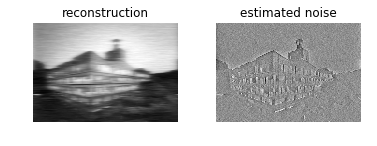

reconstruction error: 70.60288587375034
-----------------------------------------------------------------------
With LAMBDA = 32


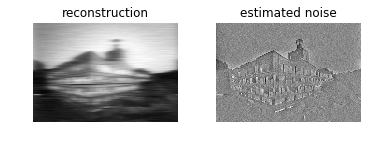

reconstruction error: 78.35639857242187
-----------------------------------------------------------------------
With LAMBDA = 64


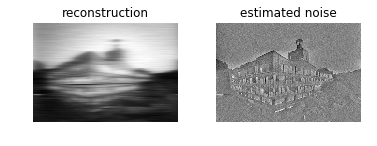

reconstruction error: 86.82584322936638
-----------------------------------------------------------------------
With LAMBDA = 128


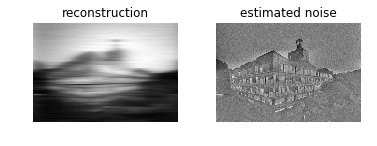

reconstruction error: 95.7528923861733
-----------------------------------------------------------------------
With LAMBDA = 256


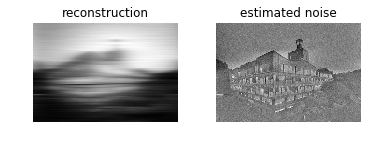

reconstruction error: 104.8658766850698
-----------------------------------------------------------------------
With LAMBDA = 512


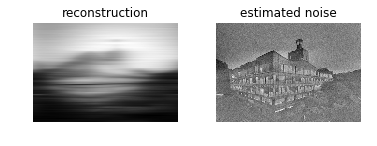

reconstruction error: 114.40817054138749
-----------------------------------------------------------------------
With LAMBDA = 1024


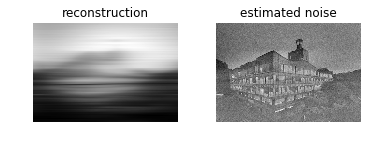

reconstruction error: 124.84888772699537
-----------------------------------------------------------------------
With LAMBDA = 2048


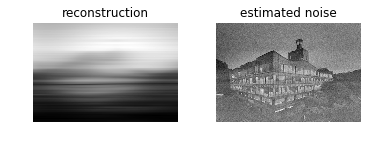

reconstruction error: 135.63100047460034
-----------------------------------------------------------------------
With LAMBDA = 4096


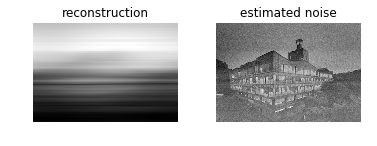

reconstruction error: 145.00144539349424
-----------------------------------------------------------------------
With LAMBDA = 8192


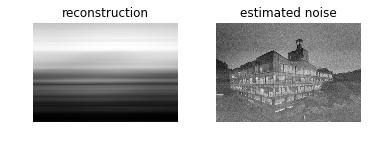

reconstruction error: 151.73231287571596
-----------------------------------------------------------------------
With LAMBDA = 16384


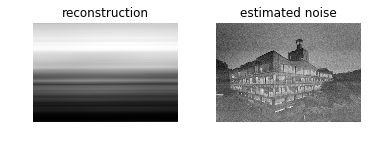

reconstruction error: 155.94548650301113
-----------------------------------------------------------------------


In [4]:
errors = []

print('---------------------------Reconstruction---------------------------')

for i in range(20):
    
    LAMBDA = 2 ** (i - 5)
    print('With LAMBDA =', LAMBDA)
    # w: noise vector converted into column vector
    w = im_noise.reshape((-1, 1))
    # b: add w.shape[0] * 2 number of 0 to fit the size of A
    b = np.concatenate((w, np.zeros((w.shape[0] * 2, 1))), axis=0)

    # create dx
    dx_mat = diags([-1 * np.ones(w.shape[0]), 1 * np.ones(w.shape[0] - 1)], [0, 1])
    lam_dx_mat = np.sqrt(LAMBDA) * dx_mat

    # create dy
    dy_mat = diags([-1 * np.ones(w.shape[0]), 1 * np.ones(w.shape[0] - 1)], [0, -1])
    lam_dy_mat = np.sqrt(LAMBDA) * dy_mat

    # for computing efficiency, use sparse matrix
    I_sparse = eye(w.shape[0])
    A_sparse = vstack([I_sparse, lam_dx_mat, lam_dy_mat])
    solution = lsqr(A=A_sparse, b=b)
     
    # solution
    v = solution[0]
    im_recon = v.reshape(im.shape)
    noise_recon = im_noise - im_recon
    error       = np.linalg.norm(im - im_recon)
    errors.append(error)
    
    # plot results
    p3 = plt.subplot(2,2,3)
    p3.set_title('reconstruction')
    plt.imshow(im_recon, cmap='gray')
    plt.axis('off')

    p4 = plt.subplot(2,2,4)
    p4.set_title('estimated noise')
    plt.imshow(noise_recon, cmap='gray')
    plt.axis('off')

    plt.show()
    print('reconstruction error:', error)
    print('-----------------------------------------------------------------------')

## Plot the change of reconstruction error with varying $\lambda$
* The reconstruction error $\epsilon(u;\lambda) = ||u-f||_{2}^2 + \lambda||\nabla u||_{2}^2 $ where $||\nabla u||_{2}^2 = ||\frac{\partial u}{\partial x}||_{2}^2 + ||\frac{\partial u}{\partial y}||_{2}^2 $ and $\lambda \in \mathbb{R}$ is a weight  

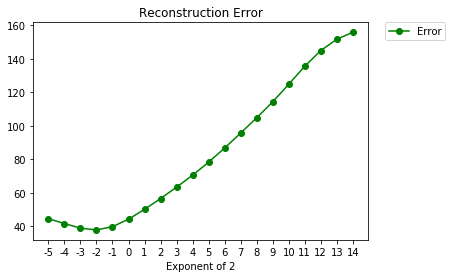

In [7]:
x_idx_value = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
x_idx = [i for i in range(0, len(x_idx_value))]
plt.plot(x_idx, errors, color = 'g', marker='o', label='Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Exponent of 2')
plt.xticks(x_idx, x_idx_value)
plt.title('Reconstruction Error')
plt.show()

> When $\lambda = 2^{-2}$, the reconstruction error records the lowest level. After $\lambda = 2^{-2}$, as the $\lambda$ size gets larger, the error increases and the reconstructed image becomes too smooth that even we can not recognize the objectives in the image.